In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [80]:
data_frame = pd.read_csv("exchange-rates_lka.csv")
data_frame.head(20)

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Element Code,Element,ISO Currency Code,Currency,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,NaN,NaN,NaN,NaN,NaN,#date+year,NaN,NaN,#indicator+type,#indicator+value+num,NaN
1,LKA,1970-01-01,1970-12-31,38.0,'144,Sri Lanka,LCU,Local currency units per USD,LNR,Ceylon Rupee,1970.0,1970,7021.0,Annual value,NaN,5.952370005000000,X
2,LKA,1970-01-01,1970-01-31,38.0,'144,Sri Lanka,LCU,Local currency units per USD,LNR,Ceylon Rupee,1970.0,1970,7001.0,January,NaN,5.952370005000000,X
3,LKA,1970-02-01,1970-02-28,38.0,'144,Sri Lanka,LCU,Local currency units per USD,LNR,Ceylon Rupee,1970.0,1970,7002.0,February,NaN,5.952370005000000,X
4,LKA,1970-03-01,1970-03-31,38.0,'144,Sri Lanka,LCU,Local currency units per USD,LNR,Ceylon Rupee,1970.0,1970,7003.0,March,NaN,5.952370005000000,X
5,LKA,1970-04-01,1970-04-30,38.0,'144,Sri Lanka,LCU,Local currency units per USD,LNR,Ceylon Rupee,1970.0,1970,7004.0,April,NaN,5.952370005000000,X
6,LKA,1970-05-01,1970-05-31,38.0,'144,Sri Lanka,LCU,Local currency units per USD,LNR,Ceylon Rupee,1970.0,1970,7005.0,May,NaN,5.952370005000000,X
7,LKA,1970-06-01,1970-06-30,38.0,'144,Sri Lanka,LCU,Local currency units per USD,LNR,Ceylon Rupee,1970.0,1970,7006.0,June,NaN,5.952370005000000,X
8,LKA,1970-07-01,1970-07-31,38.0,'144,Sri Lanka,LCU,Local currency units per USD,LNR,Ceylon Rupee,1970.0,1970,7007.0,July,NaN,5.952370005000000,X
9,LKA,1970-08-01,1970-08-31,38.0,'144,Sri Lanka,LCU,Local currency units per USD,LNR,Ceylon Rupee,1970.0,1970,7008.0,August,NaN,5.952370005000000,X


In [81]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Iso3               814 non-null    object 
 1   StartDate          814 non-null    object 
 2   EndDate            814 non-null    object 
 3   Area Code          813 non-null    float64
 4   Area Code (M49)    813 non-null    object 
 5   Area               814 non-null    object 
 6   Element Code       813 non-null    object 
 7   Element            813 non-null    object 
 8   ISO Currency Code  813 non-null    object 
 9   Currency           813 non-null    object 
 10  Year Code          813 non-null    float64
 11  Year               814 non-null    object 
 12  Months Code        813 non-null    float64
 13  Months             813 non-null    object 
 14  Unit               1 non-null      object 
 15  Value              814 non-null    object 
 16  Flag               813 non

In [82]:
# Data cleaning
cleaned_df = data_frame[data_frame['Months Code'] != 7021]
cleaned_df.loc[:, 'Element Code'] = cleaned_df['Element Code'].replace(['LCU', 'SLC'], [1, 0])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13432\1343957470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[:, 'Element Code'] = cleaned_df['Element Code'].replace(['LCU', 'SLC'], [1, 0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13432\1343957470.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cleaned_df.loc[:, 'Element Code'] = cleaned_df['Element Code'].replace(['LCU', 'SLC'], [1, 0])


In [83]:
# Data extraction
features = cleaned_df[['Element Code', 'Year Code', 'Months Code']]
target = cleaned_df['Value']
features = features.dropna()
target = target.drop(0)

In [84]:
# Model creation
model = linear_model.LinearRegression()
model.fit(features.values, target)

LinearRegression()

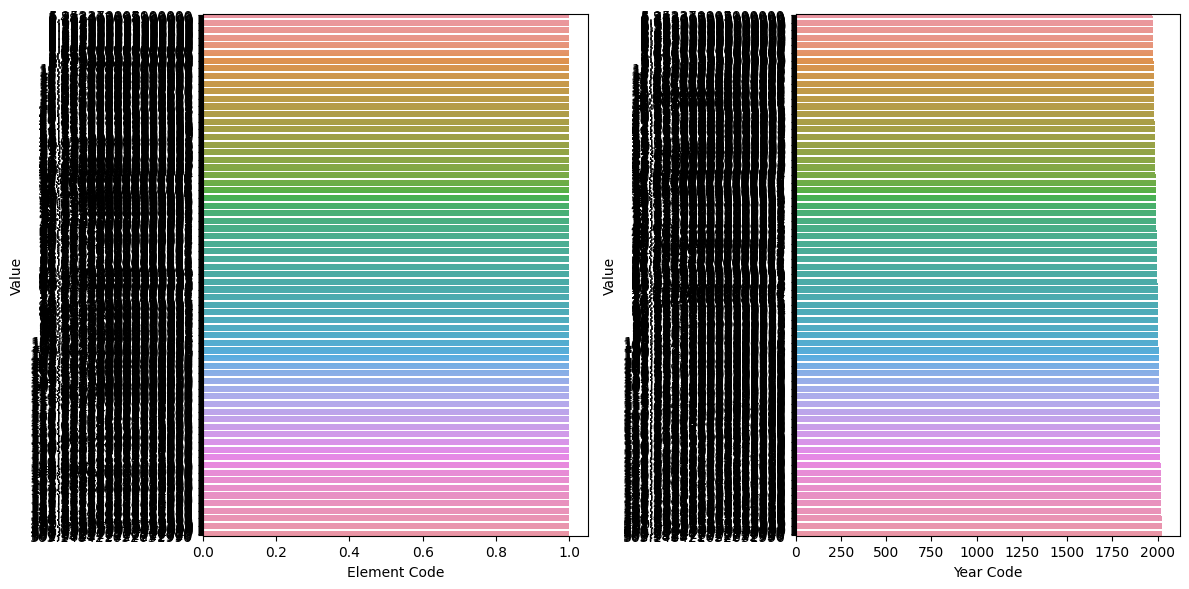

In [85]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x=features['Element Code'], y=target, ax=ax[0])
sns.barplot(x=features['Year Code'], y=target, ax=ax[1])
plt.tight_layout()
plt.show()

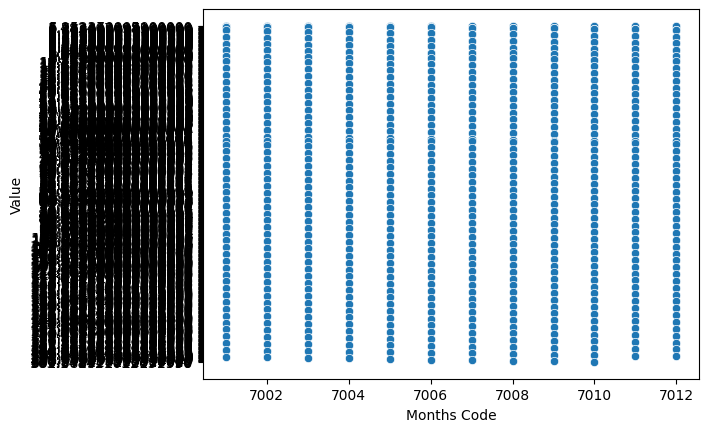

In [86]:
# Testing
sns.scatterplot(x=x['Months Code'], y=y)
plt.show()

In [87]:
# Prediction
prediction = model.predict([[1, 2019, 7007]])
print(prediction)

[159.71233396]
